In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


If age is below 30 then the person have less change of getting Diabetes.

If age is above 30 then the person getting a diabetes is high

If no of pregnancies < 5 then chances of getting a diabetes is low

If no of pregnancies > 5 then chances of getting a diabetes is high

If glucose level > 125 then person will have diabetes

If BP > 70 then person has Diabetes

if BMI is > 30 then the person is diabetic

If DiabetesPedigree Function > 0.5 then the person has diabetes

If Age > 30 then the person getting diabetes is high

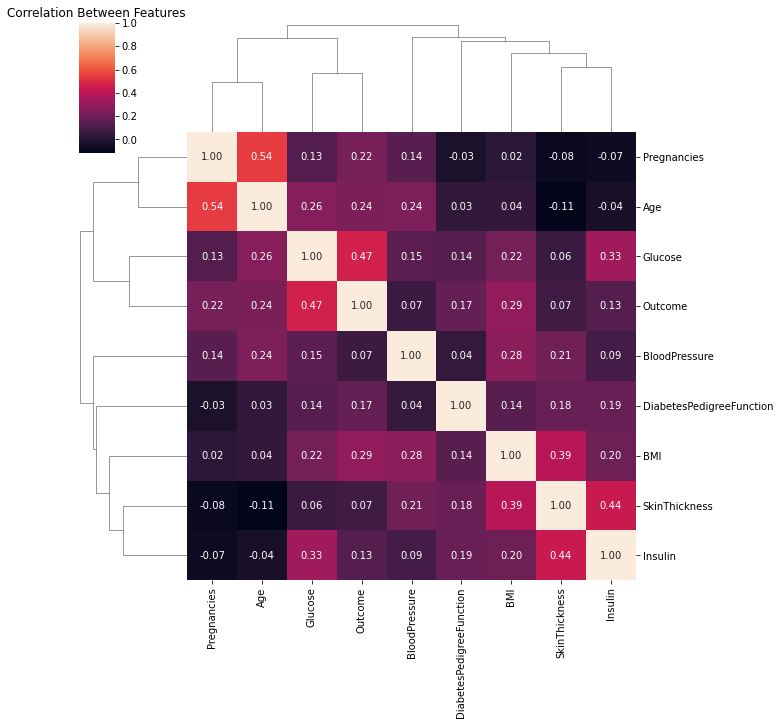

In [ ]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

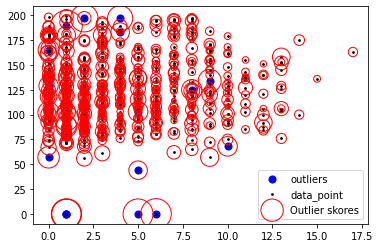

In [ ]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist()

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point')

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) 
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

In [ ]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63263612,  0.8781004 ,  0.15543612, ...,  0.21125668,
         0.47647266,  1.47447758],
       [-0.84973271, -1.22224435, -0.16036837, ..., -0.71306862,
        -0.36626432, -0.18037457],
       [ 1.22558366,  2.0449586 , -0.26563653, ..., -1.14882198,
         0.61387543, -0.09327709],
       ...,
       [ 0.33616236, -0.02204735,  0.15543612, ..., -0.76588721,
        -0.68992417, -0.26747205],
       [-0.84973271,  0.14464668, -0.47617285, ..., -0.25090597,
        -0.37237111,  1.21318514],
       [-0.84973271, -0.95553391,  0.05016796, ..., -0.21129203,
        -0.47618653, -0.87715442]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_test.shape, y_train.shape)

(597, 8) (150, 8) (150,) (597,)


In [ ]:
def initiate_clf(modeling):
  
    y_pred = modeling.fit(x_train, y_train).predict(x_test)
    Accuracy = accuracy_score(y_test, y_pred)
    return Accuracy

modeling = [LogisticRegression(random_state = 0),
      RandomForestClassifier(random_state = 0),
      SVC(random_state = 0, probability = True),
       KNeighborsClassifier(),
       GaussianNB()]

metric_list = []
for clf in modeling:
    initiate_clf(clf)
    metrics = initiate_clf(clf)
    metric_list.append(metrics)
metric_list

[0.86, 0.8466666666666667, 0.8466666666666667, 0.7866666666666666, 0.84]

In [ ]:
model = LogisticRegression(C=1.0)
model.fit(x_train,y_train)
print("train score",model.score(x_train,y_train))
print("test score",model.score(x_test,y_test))

train score 0.7587939698492462
test score 0.86


In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
accuracy_score(model.predict(x_test),y_test)

0.86